## MSCA 31009 Machine Learning & Predictive Analytics
## Assignment 5
## Duo Zhou

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics as skm
from sklearn import svm

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## 1. Data Processing:

a) Import the data: You are provided separate .csv files for train and test.

Train shape: (507, 148)
Test shape: (168, 148)
b) Remove any rows that have missing data across both sets of data.


In [32]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

train = train.dropna(how='any', axis = 0)
test = test.dropna(how='any', axis = 0)

print(train.shape)
print(test.shape)

(507, 148)
(168, 148)


In [33]:
train.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3,BrdIndx_40,Area_40,Round_40,Bright_40,Compact_40,ShpIndx_40,Mean_G_40,Mean_R_40,Mean_NIR_40,SD_G_40,SD_R_40,SD_NIR_40,LW_40,GLCM1_40,Rect_40,GLCM2_40,Dens_40,Assym_40,...,Round_120,Bright_120,Compact_120,ShpIndx_120,Mean_G_120,Mean_R_120,Mean_NIR_120,SD_G_120,SD_R_120,SD_NIR_120,LW_120,GLCM1_120,Rect_120,GLCM2_120,Dens_120,Assym_120,NDVI_120,BordLngth_120,GLCM3_120,BrdIndx_140,Area_140,Round_140,Bright_140,Compact_140,ShpIndx_140,Mean_G_140,Mean_R_140,Mean_NIR_140,SD_G_140,SD_R_140,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,concrete,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,11.24,11.47,11.24,8.18,0.43,0.78,6.64,0.87,0.99,-0.10,100,4322.47,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,11.24,11.47,11.24,8.18,0.43,0.78,6.64,0.87,0.99,...,2.43,189.73,3.62,3.40,163.61,201.29,204.28,25.25,28.33,28.30,3.82,0.79,0.57,8.35,0.96,0.96,-0.10,1188,1298.99,2.93,9172,2.50,185.14,3.94,3.95,159.45,196.43,199.53,27.81,31.55,31.15,5.04,0.80,0.58,8.56,0.82,0.98,-0.10,1512,1287.52
1,shadow,1.59,864,0.94,47.56,1.41,1.87,36.82,48.78,57.09,8.15,8.02,8.36,3.05,0.43,0.85,6.75,1.81,0.73,-0.14,220,3331.33,1.08,1353,0.46,49.12,1.09,1.33,38.29,50.40,58.67,8.84,9.97,10.55,3.70,0.51,0.96,6.96,1.67,0.86,...,0.46,49.82,1.07,1.32,38.88,51.21,59.38,10.07,11.89,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74,1.07,1377,0.46,49.82,1.07,1.32,38.88,51.21,59.38,10.07,11.89,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74
2,shadow,1.41,409,1.00,51.38,1.37,1.53,41.72,51.96,60.48,8.11,9.20,9.61,1.94,0.54,0.86,6.51,1.82,0.69,-0.11,124,2816.16,1.75,1094,1.91,49.05,1.84,1.98,40.06,50.07,57.02,10.54,10.81,11.55,2.57,0.49,0.75,6.93,1.49,0.88,...,2.00,46.57,2.78,2.79,40.01,46.34,53.36,14.49,11.78,12.31,3.57,0.65,0.60,7.11,1.16,0.93,-0.07,602,1432.44,3.33,5932,1.69,55.06,2.68,3.89,59.76,48.66,56.76,30.65,18.59,18.75,3.09,0.90,0.63,8.32,1.38,0.84,0.10,1198,720.38
3,tree,2.58,187,1.91,70.08,3.41,3.11,93.13,55.20,61.92,28.60,15.88,15.09,3.23,0.73,0.50,7.28,1.03,0.89,0.26,170,2442.01,2.86,871,2.22,90.21,3.34,3.93,117.16,72.76,80.70,42.07,27.05,27.38,5.25,0.84,0.51,8.56,0.89,0.95,...,1.65,69.80,2.20,3.22,86.22,58.03,65.15,47.93,26.70,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524,891.36,2.18,1660,1.65,69.80,2.20,3.22,86.22,58.03,65.15,47.93,26.70,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524,891.36
4,asphalt,2.60,116,2.05,89.57,3.06,3.02,73.17,94.89,100.64,5.41,5.20,5.27,2.30,0.43,0.59,6.02,1.23,0.82,-0.13,130,4912.28,4.02,501,2.33,100.69,4.29,4.40,83.66,106.21,112.19,15.39,16.50,16.44,2.24,0.64,0.45,7.28,1.13,0.79,...,1.05,96.24,2.00,2.56,82.84,100.31,105.55,30.51,32.60,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496,1194.76,2.53,2351,1.05,96.24,2.00,2.56,82.84,100.31,105.55,30.51,32.60,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496,1194.76


c) The target variable (dependent variable) is called "class", make sure to separate this out into a "y_train" and "y_test" and remove from your "X_train" and "X_test". 


In [34]:
y_train = train['class']
y_test  = test['class']

In [35]:
y_train.head()

0    concrete 
1      shadow 
2      shadow 
3        tree 
4     asphalt 
Name: class, dtype: object

In [36]:
train.drop(columns='class', inplace=True)
test.drop(columns='class', inplace=True)
train.head()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3,BrdIndx_40,Area_40,Round_40,Bright_40,Compact_40,ShpIndx_40,Mean_G_40,Mean_R_40,Mean_NIR_40,SD_G_40,SD_R_40,SD_NIR_40,LW_40,GLCM1_40,Rect_40,GLCM2_40,Dens_40,Assym_40,NDVI_40,...,Round_120,Bright_120,Compact_120,ShpIndx_120,Mean_G_120,Mean_R_120,Mean_NIR_120,SD_G_120,SD_R_120,SD_NIR_120,LW_120,GLCM1_120,Rect_120,GLCM2_120,Dens_120,Assym_120,NDVI_120,BordLngth_120,GLCM3_120,BrdIndx_140,Area_140,Round_140,Bright_140,Compact_140,ShpIndx_140,Mean_G_140,Mean_R_140,Mean_NIR_140,SD_G_140,SD_R_140,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,11.24,11.47,11.24,8.18,0.43,0.78,6.64,0.87,0.99,-0.10,100,4322.47,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,11.24,11.47,11.24,8.18,0.43,0.78,6.64,0.87,0.99,-0.10,...,2.43,189.73,3.62,3.40,163.61,201.29,204.28,25.25,28.33,28.30,3.82,0.79,0.57,8.35,0.96,0.96,-0.10,1188,1298.99,2.93,9172,2.50,185.14,3.94,3.95,159.45,196.43,199.53,27.81,31.55,31.15,5.04,0.80,0.58,8.56,0.82,0.98,-0.10,1512,1287.52
1,1.59,864,0.94,47.56,1.41,1.87,36.82,48.78,57.09,8.15,8.02,8.36,3.05,0.43,0.85,6.75,1.81,0.73,-0.14,220,3331.33,1.08,1353,0.46,49.12,1.09,1.33,38.29,50.40,58.67,8.84,9.97,10.55,3.70,0.51,0.96,6.96,1.67,0.86,-0.14,...,0.46,49.82,1.07,1.32,38.88,51.21,59.38,10.07,11.89,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74,1.07,1377,0.46,49.82,1.07,1.32,38.88,51.21,59.38,10.07,11.89,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74
2,1.41,409,1.00,51.38,1.37,1.53,41.72,51.96,60.48,8.11,9.20,9.61,1.94,0.54,0.86,6.51,1.82,0.69,-0.11,124,2816.16,1.75,1094,1.91,49.05,1.84,1.98,40.06,50.07,57.02,10.54,10.81,11.55,2.57,0.49,0.75,6.93,1.49,0.88,-0.11,...,2.00,46.57,2.78,2.79,40.01,46.34,53.36,14.49,11.78,12.31,3.57,0.65,0.60,7.11,1.16,0.93,-0.07,602,1432.44,3.33,5932,1.69,55.06,2.68,3.89,59.76,48.66,56.76,30.65,18.59,18.75,3.09,0.90,0.63,8.32,1.38,0.84,0.10,1198,720.38
3,2.58,187,1.91,70.08,3.41,3.11,93.13,55.20,61.92,28.60,15.88,15.09,3.23,0.73,0.50,7.28,1.03,0.89,0.26,170,2442.01,2.86,871,2.22,90.21,3.34,3.93,117.16,72.76,80.70,42.07,27.05,27.38,5.25,0.84,0.51,8.56,0.89,0.95,0.23,...,1.65,69.80,2.20,3.22,86.22,58.03,65.15,47.93,26.70,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524,891.36,2.18,1660,1.65,69.80,2.20,3.22,86.22,58.03,65.15,47.93,26.70,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524,891.36
4,2.60,116,2.05,89.57,3.06,3.02,73.17,94.89,100.64,5.41,5.20,5.27,2.30,0.43,0.59,6.02,1.23,0.82,-0.13,130,4912.28,4.02,501,2.33,100.69,4.29,4.40,83.66,106.21,112.19,15.39,16.50,16.44,2.24,0.64,0.45,7.28,1.13,0.79,-0.12,...,1.05,96.24,2.00,2.56,82.84,100.31,105.55,30.51,32.60,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496,1194.76,2.53,2351,1.05,96.24,2.00,2.56,82.84,100.31,105.55,30.51,32.60,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496,1194.76


d) Scale all features / predictors (NOT THE TARGET VARIABLE)

Feel free to use the sklearn tool "StandardScaler" - more info here: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html (Links to an external site.)

Note: We need to scale here due to SVM. Please refer to previous assignments if you have forgotten appropriate scaling.

In [37]:
scaler = StandardScaler()
# Note we use train mean and sd to scale bith train and test data
scaler.fit(train)

X_train_scaled = pd.DataFrame(scaler.transform(train), columns=train.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(test), columns=test.columns)

In [38]:
X_test_scaled.head()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3,BrdIndx_40,Area_40,Round_40,Bright_40,Compact_40,ShpIndx_40,Mean_G_40,Mean_R_40,Mean_NIR_40,SD_G_40,SD_R_40,SD_NIR_40,LW_40,GLCM1_40,Rect_40,GLCM2_40,Dens_40,Assym_40,NDVI_40,...,Round_120,Bright_120,Compact_120,ShpIndx_120,Mean_G_120,Mean_R_120,Mean_NIR_120,SD_G_120,SD_R_120,SD_NIR_120,LW_120,GLCM1_120,Rect_120,GLCM2_120,Dens_120,Assym_120,NDVI_120,BordLngth_120,GLCM3_120,BrdIndx_140,Area_140,Round_140,Bright_140,Compact_140,ShpIndx_140,Mean_G_140,Mean_R_140,Mean_NIR_140,SD_G_140,SD_R_140,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,-1.221577,-0.675542,-0.476591,1.041138,-0.912836,-1.124818,0.703688,1.082655,1.094633,2.152514,2.642830,2.319919,-0.085216,-0.562228,1.006482,-0.780311,0.034290,0.483397,-0.604088,-1.224677,1.440512,-1.152568,-0.736193,-0.418816,1.005655,-0.945329,-1.191577,0.670774,1.049783,1.070957,1.539796,1.925406,1.753955,-0.202586,-1.229994,0.860960,-1.491551,0.240285,0.222749,-0.631085,...,-0.855411,1.102299,-0.926964,-1.439868,0.779929,1.144338,1.178201,0.115424,0.379037,0.282297,-0.201660,-2.788451,1.202081,-2.143607,0.434727,0.197124,-0.771035,-1.251205,4.804886,-1.478456,-0.998090,-0.922137,1.115630,-0.938156,-1.490014,0.800451,1.158040,1.194545,-0.014217,0.221277,0.129506,-0.188670,-3.000051,1.278539,-2.234303,0.474507,0.183615,-0.803547,-1.224828,5.070035
1,0.540344,-0.460631,0.574291,0.800037,0.312553,0.324191,0.364434,0.914359,0.903921,-0.837096,-0.554302,-0.518321,-0.480827,-0.766858,-0.625129,-0.484135,-0.111312,0.271020,-0.718647,-0.308095,0.824482,0.843511,-0.131282,0.081735,0.718973,-0.096461,0.929861,0.287661,0.843883,0.829564,-0.618349,-0.406887,-0.345206,0.071062,-0.281154,-0.314816,0.132433,-0.358851,0.758957,-0.752305,...,-0.168785,0.841776,-0.095604,0.806774,0.441698,0.946109,0.948896,-0.231689,-0.066734,-0.052881,-0.143452,-0.132586,-0.342799,0.613181,-0.218763,0.630627,-0.843133,0.662263,0.483222,0.734136,-0.034362,-0.242981,0.854260,-0.161280,0.617310,0.457597,0.958765,0.964146,-0.344561,-0.203140,-0.189572,-0.138043,-0.261676,-0.241913,0.471713,-0.168031,0.621794,-0.878340,0.316804,0.652683
2,0.152398,-0.424813,0.413987,1.053803,-0.134084,-0.093792,0.680361,1.116450,1.113446,-0.919693,-1.039942,-0.880702,-0.705203,-0.289388,0.394628,-0.879036,0.849662,-1.852741,-0.604088,-0.418085,-0.022004,0.023693,-0.182847,0.157576,1.091417,-0.388545,-0.060810,0.747431,1.145136,1.140010,-1.014595,-0.842491,-0.838181,-0.148985,-1.302981,0.214283,-1.080889,0.090501,0.676464,-0.631085,...,-0.791835,1.030207,-0.637567,-1.022182,0.733144,1.081171,1.085387,-0.735385,-0.639518,-0.630180,-0.157422,-0.407330,0.635625,-0.914054,0.457261,0.630627,-0.698937,-0.673768,-0.169920,-1.068716,-0.427372,-0.859253,1.043303,-0.667724,-1.098230,0.753027,1.094540,1.101288,-0.823922,-0.748485,-0.739139,-0.150193,-0.544956,0.721040,-1.027395,0.496664,0.621794,-0.728753,-0.759601,-0.014920
3,0.637331,-0.234259,0.075567,1.025624,0.346910,0.630713,0.647568,1.103504,1.077974,-1.000276,-0.889965,-0.897726,0.103733,-0.425808,0.122693,-0.656904,-0.227794,0.865674,-0.661367,0.260186,0.673354,1.021732,1.432837,1.340695,1.076397,1.026235,0.859814,0.685027,1.160470,1.135308,-0.651067,-0.539124,-0.501940,-0.126416,-0.281154,-0.491182,-0.091565,-0.633456,0.800204,-0.691695,...,-0.486667,1.093074,-0.537593,-0.515897,0.707642,1.184280,1.169622,-0.850396,-0.818154,-0.809402,0.110336,0.142159,0.635625,-0.655200,-0.263832,1.064129,-0.843133,0.019156,-0.112437,-0.740925,0.316372,-0.557405,1.106375,-0.574302,-0.623340,0.727177,1.198193,1.185925,-0.933377,-0.918564,-0.909751,0.082694,0.021605,0.721040,-0.773309,-0.212344,1.059973,-0.878340,-0.201330,0.043835
4,0.200891,0.546581,0.877087,0.436406,0.106413,2.539504,-0.005246,0.589486,0.570749,0.148025,-0.094848,0.150501,5.860762,1.006602,-0.897064,2.008684,-2.790391,1.545277,-0.775926,2.881612,-0.758728,-0.1

### 2. Random Forest Classifier - Base Model:

Start by creating a simple Random Forest only using default parameters - this will let us compare SVMs to Random Forest in multiclass problems.

a) Use the RandomForestClassifier in sklearn. Fit your model on the training data.

b) Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes.

c) Calculate the confusion matrix and classification report for the test data. 

d)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [39]:
rf = RandomForestClassifier()

rf.fit(X_train_scaled, y_train)

y_train_pred_rf = rf.predict(X_train_scaled)
y_test_pred_rf = rf.predict(X_test_scaled)

In [43]:

print("Random Forest Train Score:", rf.score(X_train_scaled, y_train))
print("\nRandom Forest Train Confusion Matrix")
print(skm.confusion_matrix(y_train, y_train_pred_rf))
print("\nRandom Forest Train Classification Report")
print(skm.classification_report(y_train, y_train_pred_rf))
print('-'*53 + '\n')
print("Random Forest Test Score:", rf.score(X_test_scaled, y_test))
print("\nRandom Forest Test Confusion Matrix")
print(skm.confusion_matrix(y_test, y_test_pred_rf))
print("\nRandom Forest Test Classification Report")
print(skm.classification_report(y_test, y_test_pred_rf))

Random Forest Train Score: 1.0

Random Forest Train Confusion Matrix
[[45  0  0  0  0  0  0  0  0]
 [ 0 97  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0]
 [ 0  0  0 93  0  0  0  0  0]
 [ 0  0  0  0 83  0  0  0  0]
 [ 0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0 89]]

Random Forest Train Classification Report
              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        1.00      1.00      1.00        97
        car        1.00      1.00      1.00        21
   concrete        1.00      1.00      1.00        93
      grass        1.00      1.00      1.00        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        1.00      1.00      1.00        89

    accuracy                           1.00       507
   macro avg       1.

The overall accuracy is 1 for training set and 0.83 for test set. This is a clear sign of overfitting since the model performance droped a lot when applied to new unseen test data.

e) Identify the top 5 features. Feel free to print a list OR to make a plot. 

Text(0.5, 1.0, 'Top 5 Feature Importance of Random Forest Base Model')

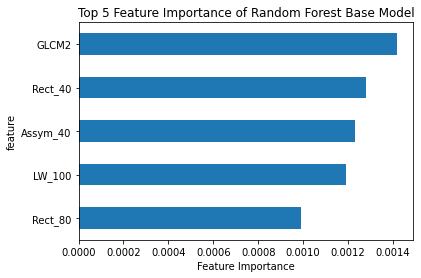

In [79]:
feature_importances = pd.DataFrame({'feature':train.columns, 'importance':rf.feature_importances_})
feature_importances.sort_values('importance', ascending=True, inplace=True)
pt = feature_importances.iloc[:5,].plot.barh(x='feature',y='importance', legend=False)
pt.set_xlabel('Feature Importance')
pt.set_title('Top 5 Feature Importance of Random Forest Base Model')

### 3. LinearSVM Classifier - Base Model:

Create a simple LinearSVC Classifier only using default parameters.

a) Use the LinearSVC in sklearn. Fit your model on the training data.

b) Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes.

c) Calculate the confusion matrix and classification report for test data.

d)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [116]:
svc = svm.LinearSVC()
svc.fit(X_train_scaled, y_train)

y_train_pred_svc = svc.predict(X_train_scaled)
y_test_pred_svc = svc.predict(X_test_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [118]:
print("LinearSVM  Train Score:",svc.score(X_train_scaled, y_train))
print("\nLinearSVM  Train Confusion Matrix")
print(skm.confusion_matrix(y_train, y_train_pred_svc))
print("\nLinearSVM  Train Classification Report")
print(skm.classification_report(y_train, y_train_pred_svc))
print('-'*60 + '\n')
print("LinearSVM  Test Score:", svc.score(X_test_scaled, y_test))
print("\nLinearSVM  Test Confusion Matrix")
print(skm.confusion_matrix(y_test, y_test_pred_svc))
print("\nLinearSVM  Test Classification Report")
print(skm.classification_report(y_test, y_test_pred_svc))

LinearSVM  Train Score: 0.9940828402366864

LinearSVM  Train Confusion Matrix
[[45  0  0  0  0  0  0  0  0]
 [ 0 97  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0]
 [ 0  0  0 93  0  0  0  0  0]
 [ 0  1  0  0 80  0  0  0  2]
 [ 0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0 89]]

LinearSVM  Train Classification Report
              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        0.99      1.00      0.99        97
        car        1.00      1.00      1.00        21
   concrete        1.00      1.00      1.00        93
      grass        1.00      0.96      0.98        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        0.98      1.00      0.99        89

    accuracy                           0.99       507
   macro avg   

The overall accuracy is 0.99 for training set and 0.77 for test set. This is a clear sign of overfitting since the model performance droped a lot when applied to new unseen test data.

### 4. Support Vector Machine Classifier + Linear Kernel + Grid Search:

We will now use GridSearchCV to try various hyperparameters in a SVM with linear kernel.

a) Use SVC from sklearn with kernel = "linear". Run the GridSearchCV using the following (SVMs run much faster than RandomForest):

C: 0.01 - 10 in increments of 0.2 (consider using the np.arange() method from numpy to build out a sequence of values)

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring. Please set verbose = 0 to reduce the printing (sorry to our grader for not specifying this last week!).

b) Identify the best performing model:

.best_params_() : This method outputs to best performing parameters
.best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test

c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

d) Calculate the confusion matrix and classification report for test data.

e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [126]:
# Define C
Cs = np.arange(0.0, 10, 0.2)
Cs[0] = 0.01
Cs = np.append(Cs, 10)
Cs

array([ 0.01,  0.2 ,  0.4 ,  0.6 ,  0.8 ,  1.  ,  1.2 ,  1.4 ,  1.6 ,
        1.8 ,  2.  ,  2.2 ,  2.4 ,  2.6 ,  2.8 ,  3.  ,  3.2 ,  3.4 ,
        3.6 ,  3.8 ,  4.  ,  4.2 ,  4.4 ,  4.6 ,  4.8 ,  5.  ,  5.2 ,
        5.4 ,  5.6 ,  5.8 ,  6.  ,  6.2 ,  6.4 ,  6.6 ,  6.8 ,  7.  ,
        7.2 ,  7.4 ,  7.6 ,  7.8 ,  8.  ,  8.2 ,  8.4 ,  8.6 ,  8.8 ,
        9.  ,  9.2 ,  9.4 ,  9.6 ,  9.8 , 10.  ])

In [127]:
parameters = {'C': Cs}

svc = svm.SVC(kernel='linear')

In [128]:
grid_search = GridSearchCV(svc, parameters, cv=5, refit=True, n_jobs=-1, verbose=0, return_train_score=True)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([ 0.01,  0.2 ,  0.4 ,  0.6 ,  0.8 ,  1.  ,  1.2 ,  1.4 ,  1.6 ,
        1.8 ,  2.  ,  2.2 ,  2.4 ,  2.6 ,  2.8 ,  3.  ,  3.2 ,  3.4 ,
        3.6 ,  3.8 ,  4.  ,  4.2 ,  4.4 ,  4.6 ,  4.8 ,  5.  ,  5.2 ,
        5.4 ,  5.6 ,  5.8 ,  6.  ,  6.2 ,  6.4 ,  6.6 ,  6.8 ,  7.  ,
        7.2 ,  7.4 ,  7.6 ,  7.8 ,  8.  ,  8.2 ,  8.4 ,  8.6 ,  8.8 ,
        9.  ,  9.2 ,  9.4 ,  9.6 ,  9.8 , 10.  ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             sc

In [129]:
print('Best parameters:', grid_search.best_params_)
print()
print('Best Model:', grid_search.best_estimator_)

Best parameters: {'C': 0.01}

Best Model: SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [130]:
lkgs_bm=grid_search.best_estimator_
y_train_pred_svc_lkgs = lkgs_bm.predict(X_train_scaled)
y_test_pred_svc_lkgs = lkgs_bm.predict(X_test_scaled)

In [131]:
print("\nSVC w. Linear Kernel & GridSearchCV  Train Score:", lkgs_bm.score(X_train_scaled, y_train))
print("\nSVC w. Linear Kernel & GridSearchCV  Train Confusion Matrix")
print(skm.confusion_matrix(y_train, y_train_pred_svc_lkgs))
print("\nSVC w. Linear Kernel & GridSearchCV Train Classification Report")
print(skm.classification_report(y_train, y_train_pred_svc_lkgs))
print('-'*60 + '\n')
print("SVC w. Linear Kernel & GridSearchCV Test Score:", lkgs_bm.score(X_test_scaled, y_test))
print("\nSVC w. Linear Kernel & GridSearchCV Test Confusion Matrix")
print(skm.confusion_matrix(y_test, y_test_pred_svc_lkgs))
print("\nSVC w. Linear Kernel & GridSearchCV Test Classification Report")
print(skm.classification_report(y_test, y_test_pred_svc_lkgs))


SVC w. Linear Kernel & GridSearchCV  Train Score: 0.8875739644970414

SVC w. Linear Kernel & GridSearchCV  Train Confusion Matrix
[[40  0  0  0  0  0  5  0  0]
 [ 2 87  0  7  0  0  1  0  0]
 [ 0  1 19  1  0  0  0  0  0]
 [ 0  9  0 83  1  0  0  0  0]
 [ 0  1  0  0 70  0  0  0 12]
 [ 0  1  0  0  1 12  0  0  0]
 [ 1  0  0  0  0  0 43  0  1]
 [ 0  3  0  4  2  0  0 11  0]
 [ 0  0  0  0  3  0  1  0 85]]

SVC w. Linear Kernel & GridSearchCV Train Classification Report
              precision    recall  f1-score   support

    asphalt        0.93      0.89      0.91        45
   building        0.85      0.90      0.87        97
        car        1.00      0.90      0.95        21
   concrete        0.87      0.89      0.88        93
      grass        0.91      0.84      0.88        83
       pool        1.00      0.86      0.92        14
     shadow        0.86      0.96      0.91        45
       soil        1.00      0.55      0.71        20
       tree        0.87      0.96      0.91   

The overall accuracy is 0.89 for training set and 0.81 for test set. There is less overfitting in this model as compare to the basic linear SVM model and Random Forest model. Because the model performance did not change as much when applied to new unseen test data.

### 5. Support Vector Machine Classifier + Polynomial Kernel + Grid Search:

We will now use GridSearchCV to try various hyperparameters in a SVM with a polynomial kernel.

a) Use SVC from sklearn with kernel = "poly". Run the GridSearchCV using the following:

C: 0.01 - 10 in increments of 0.2
degree: 2, 3, 4, 5, 6

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring.

b) Identify the best performing model:

.best_params_() : This method outputs to best performing parameters
.best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test

c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

d) Calculate the confusion matrix and classification report for test data.

e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [178]:
svc_poly = svm.SVC(kernel='poly')

parameters = {
    'C': Cs,
    'degree': [2, 3, 4, 5, 6]
}

In [179]:
grid_search_svc_poly = GridSearchCV(svc_poly, parameters, cv=5, refit=True, n_jobs=-1, verbose=1)
grid_search_svc_poly.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 255 candidates, totalling 1275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 1275 out of 1275 | elapsed:   51.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([ 0.01,  0.2 ,  0.4 ,  0.6 ,  0.8 ,  1.  ,  1.2 ,  1.4 ,  1.6 ,
        1.8 ,  2.  ,  2.2 ,  2.4 ,  2.6 ,  2.8 ,  3.  ,  3.2 ,  3.4 ,
        3.6 ,  3.8 ,  4.  ,  4.2 ,  4.4 ,  4.6 ,  4.8 ,  5.  ,  5.2 ,
        5.4 ,  5.6 ,  5.8 ,  6.  ,  6.2 ,  6.4 ,  6.6 ,  6.8 ,  7.  ,
        7.2 ,  7.4 ,  7.6 ,  7.8 ,  8.  ,  8.2 ,  8.4 ,  8.6 ,  8.8 ,
        9.  ,  9.2 ,  9.4 ,  9.6 ,  9.8 , 10.  ]),
                         'degree': [2, 3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', re

In [180]:
print('Best parameters:', grid_search_svc_poly.best_params_)
print()
print('Best Model:', grid_search_svc_poly.best_estimator_)

Best parameters: {'C': 4.4, 'degree': 3}

Best Model: SVC(C=4.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [181]:
pkgs_bm=grid_search_svc_poly.best_estimator_
y_train_pred_svc_pkgs = pkgs_bm.predict(X_train_scaled)
y_test_pred_svc_pkgs = pkgs_bm.predict(X_test_scaled)

In [182]:
print("\nSVC w. Poly Kernel & GridSearchCV  Train Score:", pkgs_bm.score(X_train_scaled, y_train))
print("\nSVC w. Poly Kernel & GridSearchCV  Train Confusion Matrix")
print(skm.confusion_matrix(y_train, y_train_pred_svc_pkgs))
print("\nSVC w. Poly Kernel & GridSearchCV Train Classification Report")
print(skm.classification_report(y_train, y_train_pred_svc_pkgs))
print('-'*60 + '\n')
print("SVC w. Poly Kernel & GridSearchCV Test Score:", pkgs_bm.score(X_test_scaled, y_test))
print("\nSVC w. Poly Kernel & GridSearchCV Test Confusion Matrix")
print(skm.confusion_matrix(y_test, y_test_pred_svc_pkgs))
print("\nSVC w. Poly Kernel & GridSearchCV Test Classification Report")
print(skm.classification_report(y_test, y_test_pred_svc_pkgs))


SVC w. Poly Kernel & GridSearchCV  Train Score: 0.9585798816568047

SVC w. Poly Kernel & GridSearchCV  Train Confusion Matrix
[[44  0  0  0  1  0  0  0  0]
 [ 0 95  0  1  1  0  0  0  0]
 [ 0  0 20  0  1  0  0  0  0]
 [ 0  1  0 91  1  0  0  0  0]
 [ 0  1  0  0 81  0  0  0  1]
 [ 0  0  0  0  1 13  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0  9  0  0 11  0]
 [ 0  0  0  0  3  0  0  0 86]]

SVC w. Poly Kernel & GridSearchCV Train Classification Report
              precision    recall  f1-score   support

    asphalt        1.00      0.98      0.99        45
   building        0.98      0.98      0.98        97
        car        1.00      0.95      0.98        21
   concrete        0.99      0.98      0.98        93
      grass        0.83      0.98      0.90        83
       pool        1.00      0.93      0.96        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      0.55      0.71        20
       tree        0.99      0.97      0.98        8

The overall accuracy is 0.96 for training set and 0.77 for test set. The overfitting in this model is worse compare to best linear kernal gridsearch model. The model performance dropped a lot when applied to new unseen test data, we consider this model is overfitting.

### 6. Support Vector Machine Classifier + RBF Kernel + Grid Search:

We will now use GridSearchCV to try various hyperparameters in a SVM with a RBF kernel.

a) Use SVC from sklearn with kernel = "rbf". Run the GridSearchCV using the following:

C: 0.01 - 10 in increments of 0.2
gamma: 0.01,  0.1, 1, 10, 100

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring.

b) Identify the best performing model:

.best_params_() : This method outputs to best performing parameters
.best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test

c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

d) Calculate the confusion matrix and classification report for test data.

e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [168]:
svc_rbf = svm.SVC(kernel='rbf')

parameters = {
    'C': Cs,
    'gamma': [0.01, 0.1, 1, 10, 100]
}

In [167]:
grid_search_svc_rbf = GridSearchCV(svc_rbf, parameters, cv=5, refit=True, n_jobs=-1, verbose=1)
grid_search_svc_rbf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 255 candidates, totalling 1275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 1275 out of 1275 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([ 0.01,  0.2 ,  0.4 ,  0.6 ,  0.8 ,  1.  ,  1.2 ,  1.4 ,  1.6 ,
        1.8 ,  2.  ,  2.2 ,  2.4 ,  2.6 ,  2.8 ,  3.  ,  3.2 ,  3.4 ,
        3.6 ,  3.8 ,  4.  ,  4.2 ,  4.4 ,  4.6 ,  4.8 ,  5.  ,  5.2 ,
        5.4 ,  5.6 ,  5.8 ,  6.  ,  6.2 ,  6.4 ,  6.6 ,  6.8 ,  7.  ,
        7.2 ,  7.4 ,  7.6 ,  7.8 ,  8.  ,  8.2 ,  8.4 ,  8.6 ,  8.8 ,
        9.  ,  9.2 ,  9.4 ,  9.6 ,  9.8 , 10.  ]),
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_job

In [169]:
print('Best parameters:', grid_search_svc_rbf.best_params_)
print()
print('Best Model:', grid_search_svc_rbf.best_estimator_)

Best parameters: {'C': 2.8000000000000003, 'gamma': 0.01}

Best Model: SVC(C=2.8000000000000003, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.01,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [170]:
rkgs_bm=grid_search_svc_rbf.best_estimator_
y_train_pred_svc_rkgs = rkgs_bm.predict(X_train_scaled)
y_test_pred_svc_rkgs = rkgs_bm.predict(X_test_scaled)

In [171]:
print("\nSVC w. RBF Kernel & GridSearchCV  Train Score:", rkgs_bm.score(X_train_scaled, y_train))
print("\nSVC w. RBF Kernel & GridSearchCV  Train Confusion Matrix")
print(skm.confusion_matrix(y_train, y_train_pred_svc_rkgs))
print("\nSVC w. RBF Kernel & GridSearchCV Train Classification Report")
print(skm.classification_report(y_train, y_train_pred_svc_rkgs))
print('-'*60 + '\n')
print("SVC w. RBF Kernel & GridSearchCV Test Score:", rkgs_bm.score(X_test_scaled, y_test))
print("\nSVC w. RBF Kernel & GridSearchCV Test Confusion Matrix")
print(skm.confusion_matrix(y_test, y_test_pred_svc_rkgs))
print("\nSVC w. RBF Kernel & GridSearchCV Test Classification Report")
print(skm.classification_report(y_test, y_test_pred_svc_rkgs))


SVC w. RBF Kernel & GridSearchCV  Train Score: 0.9881656804733728

SVC w. RBF Kernel & GridSearchCV  Train Confusion Matrix
[[45  0  0  0  0  0  0  0  0]
 [ 0 96  0  1  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0]
 [ 0  1  0 92  0  0  0  0  0]
 [ 0  1  0  0 81  0  0  0  1]
 [ 0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  1  0  0  0  0  0 19  0]
 [ 0  0  0  0  1  0  0  0 88]]

SVC w. RBF Kernel & GridSearchCV Train Classification Report
              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        0.97      0.99      0.98        97
        car        1.00      1.00      1.00        21
   concrete        0.99      0.99      0.99        93
      grass        0.99      0.98      0.98        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      0.95      0.97        20
       tree        0.99      0.99      0.99        89



The overall accuracy is 0.99 for training set and 0.85 for test set. The rbf best model has the highest test accuracy. But there is still a sign of overfitting since the model performance still dropped a considerable amount when applied to new unseen test data.

### **7. Conceptual Questions:**

#### a) From the models run in steps 2-6, which performs the best based on the Classification Report? Support your reasoning with evidence around your test data. 

*Based on the test set Classification Report, the best rbf model in step 6 has the highest accuracy of 0.85, hence it is the best model.  However the best linear kernel with grid search in C model in step 3 has a very close test set accuracy, 0.82. We can see that the gamma step 6 grid search chose is 0.01. The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. A very low gamma(0.01) resembles resembles linear kernel when data points are clustered well. The basic linear svm model has lower test accuracy than linear kernel model with grid search in C. With the correct kernel, properly tunning C can significantly improve model generalizability performance, hence reduce overfitting.*

#### b) Compare models run for steps 4-6 where different kernels were used. What is the benefit of using a polynomial or rbf kernel over a linear kernel? What could be a downside of using a polynomial or rbf kernel? 

*Kernels take data as input and transform it into the required form to better seperate data in hyper-dimensions.The linear kernel is better suited for a clear linear hyper-plane that separates different classes. The poly kernel may work better in cases involving curved hyper-planes. The RBF kernel is designed to work with more localized hyper-planes, like a circle in side a ring or any cluster that locally mixed in other clusters. The gamma parameter in RBF defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. A very low gamma resembles resembles linear kernel when data points are separated well by linear hyper-planes. Depending on how classes are seperated in the data (linear, curve or localized clustering), preoper kernels should be selected accordingly. If a non-linear kernal is selected for linear problem, the performance will drop similar to what we see in the assignment. The downside of poly and RBF kernal is that they may not work well with linear hyper-planes and they are computationally more expensive* 

#### c) Explain the 'C' parameter used in steps 4-6. What does a small C mean versus a large C in sklearn? Why is it important to use the 'C' parameter when fitting a model? 

*The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. As it becomes smaller the model become more tolerant of individual errors in classifying data points, and as it become larger the model is LESS tolerant of individual errors.*

*C is tuned to increase a classifier's generalizability (performance on test data). Usually one cannot draw a clean line between different classes of data. Some points will be within the Classification Margin (the distance between the decision boundary and the closest data point in a class) or misclassified (on the wrong side of the decision boundary). How tolerant the model is of these when fitting on the training data will influence not only the width of the margin but also where the decision boundary is drawn (because it is influenced by the maximum width one can have before hitting the first data point in a class).*

*The reason we tune the C parameter when fitting the model is to prevent overfitting. Minimizing error on training data at
the cost of increasing test error is overfitting. If we are intolerant of classification errors on our training data(selecting large C) at the expense of increasing classification errors on our test data, we will cause overfitting.*

#### d) Scaling our input data does not matter much for Random Forest, but it is a critical step for Support Vector Machines. Explain why this is such a critical step. Also, provide an example of a feature from this data set that could cause issues with our SVMs if not scaled.

*Because Support Vector Machine (SVM) optimization occurs by minimizing the decision vector w, the optimal hyperplane is influenced by the scale of the input features. If a feature is disproportionally larger in scale than the rest of the data set, this feature will overshadow all other features in creating the decision vector resulting other features' influence on minimizing decision vector becoming negligible.*

*I will use an example to demonstrate. If we have two input vectors: X1 and X2. and let's say X1 has range(0.1 to 0.8) and X2 has range(3000 to 50000). Now your SVM classifier will be a linear boundary lying in X1-X2 plane. The slope of linear decision boundary should not depend on the range of X1 and X2, but instead upon the distribution of points. Now let's make a prediction on the point (0.1, 4000) and (0.8, 4000). There will be hardly any difference in the value of the function, thus making SVM less accurate since it will have way less sensitivity to points in the X1 direction.*

*To pick an example of a feature that can cause issues on SVM, I will find the maximum of all feature means and the average of those means.*

In [186]:
mean_c=[]
rag_c=[]
for i in range(len(train.columns)):
   mean_c.append(np.mean(train.iloc[:,i]))
print('The mean of the entire data set is', np.mean(mean_c))
max_ind=mean_c.index(max(mean_c))
print('Feature with the maximun mean is', train.columns[max_ind], 'with mean of',max(mean_c))

The mean of the entire data set is 336.0132799313019
Feature with the maximun mean is Area_140 with mean of 7982.4812623274165


*We can see that the feature Area_140 has a scale with an order of magnitude larger than the average scale of the data set. This feature will definitely cause issue if not scaled*

#### e) Describe conceptually what the purpose of a kernel is for Support Vector Machines.

 *In machine learning, a “kernel” is usually used to refer to the kernel trick, a method of using a linear classifier to solve a non-linear problem. It entails transforming linearly inseparable data to linearly separable ones. The kernel function is what is applied on each data point to map the original non-linear observations into a higher-dimensional space in which they become separable.*
